<h3><b>This notebook contains the generalized mixed effects models for the regressive error w. video ratings hypothesis test</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [2]:
library(tidyverse)
library(lme4)
library(ggplot2)
task_summary <- read.csv("U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv")

In [3]:
#transform variable to all be above 0
task_summary$pos_regressive_er <- task_summary$mean_regressive_er + 0.01 ##+0.01 as all values must be positive (i.e., can't have 0s)

Determine best link and probability function for this model
<p>commented out models didn't converge

In [4]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
#gamma_log <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
#gamma_identity <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

invgaus_log <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
#invgaus_identity <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



                       Model      BIC
1            Gamma (inverse) 4596.202
3 inverse gaussian (inverse) 5905.345
2     inverse gaussian (log) 5905.383


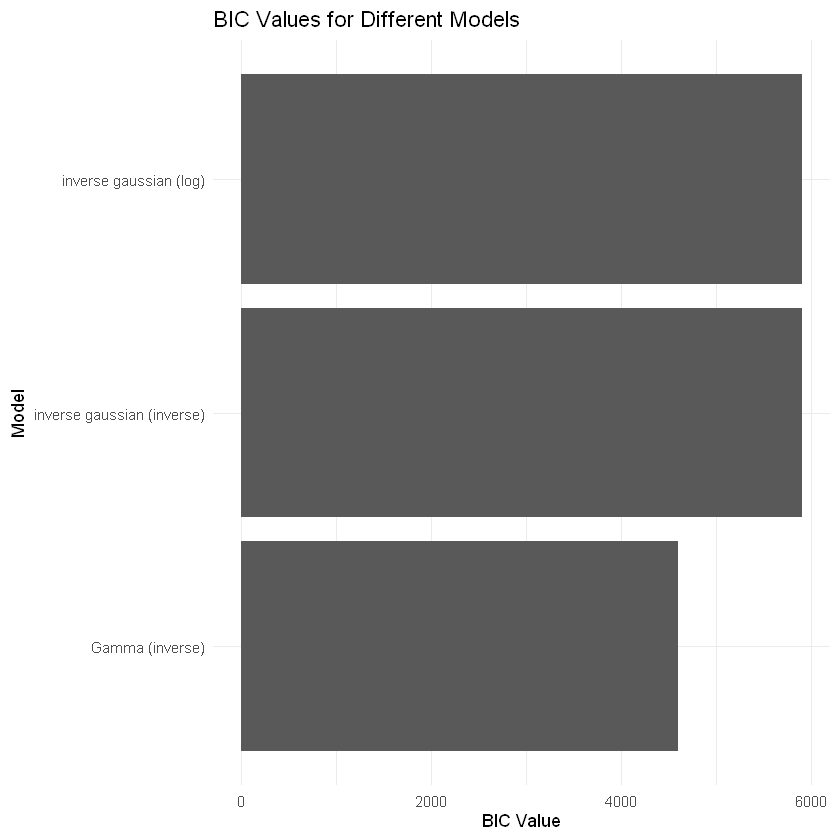

In [5]:
bic_values <- c(
  BIC(gamma_inverse),
  BIC(invgaus_log),
  BIC(invgaus_inverse)
)
model_names <- c("Gamma (inverse)", "inverse gaussian (log)", "inverse gaussian (inverse)")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##gamma inverse wins

Use this model and determine best random effects structure (as done before with linear mixed effects models in the python notebooks)

In [6]:
basic_model <-glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))

#feedback_randint <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
fractals_randint <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))

#randslope <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no), data=task_summary, family=Gamma(link="inverse"))
#feedback_randint_randslope <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint_randslope <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))

             Model      BIC
2 fractals_randint 4588.165
1      basic model 4596.202


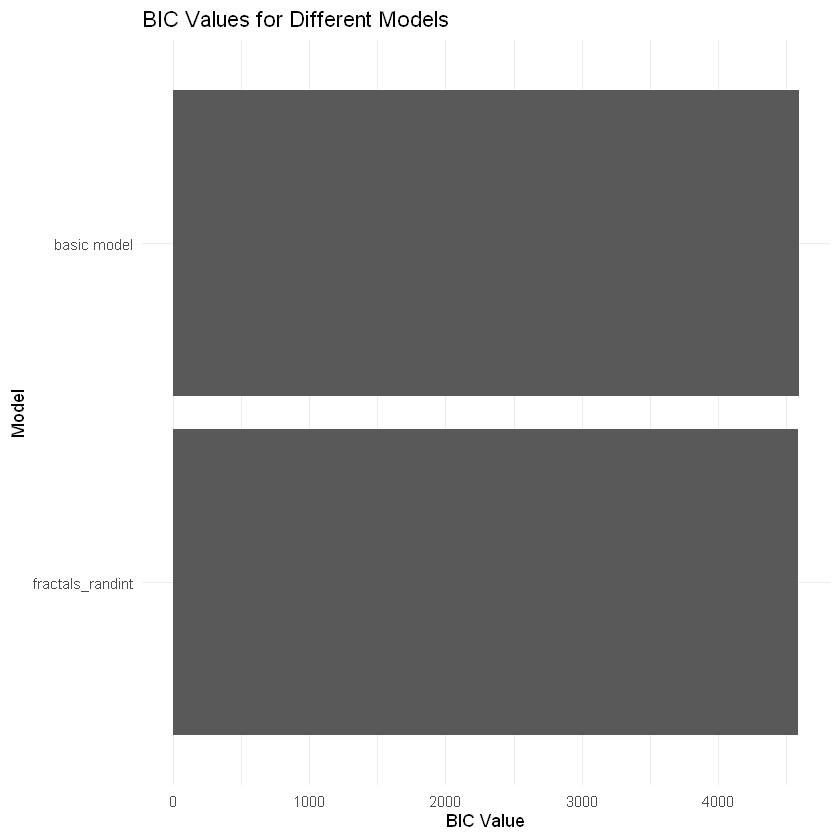

In [7]:
bic_values <- c(
  BIC(basic_model),
  BIC(fractals_randint)
)
model_names <- c("basic model", "fractals_randint")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##fractals randint wins

And now identify the best covariate structure

In [8]:
no_covariate <- fractals_randint

#sex_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + prolific_sex, data=task_summary, family=Gamma(link="inverse"))
#age_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#digit_span_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_age_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + prolific_sex + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))
#digit_span_age_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + digit_span + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_age_covariate <- glmer(pos_regressive_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + prolific_sex + prolific_age + digit_span, data=task_summary, family=Gamma(link="inverse"))

In [9]:
## no covariate the only model that converged

Hypothesis test with best fitting model

In [10]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( inverse )
Formula: pos_regressive_er ~ block_type + valence_diff + arousal_diff +  
    valence_habdiff + (1 | participant_no) + (1 | fractals)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
  4543.8   4588.2  -2262.9   4525.8     1011 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5083 -0.6452 -0.1718  0.3982  3.4338 

Random effects:
 Groups         Name        Variance  Std.Dev.
 participant_no (Intercept) 0.0298333 0.17272 
 fractals       (Intercept) 0.0003704 0.01925 
 Residual                   0.4351638 0.65967 
Number of obs: 1020, groups:  participant_no, 340; fractals, 28

Fixed effects:
                   Estimate Std. Error t value Pr(>|z|)    
(Intercept)       0.4319595  0.0215252  20.068   <2e-16 ***
block_typeFear   -0.0042333  0.0073595  -0.575    0.565    
block_typePoints  0.0117315  0.0074434   1.576    0.115    
va